In [1]:
# IMPORTS
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [16]:
# DEFINING FUNCTIONS
x = symbols('x')
f = x**4 # original function
df = diff(f, x) # derivative function

In [13]:
# COUNTING NORMALS
def normal_count(X,Y):
    eq = (x-X)+(df)*(f)-(df)*Y # Polynomial which has roots dictating x-coordinates of normals that intersect point (X,Y)
    coefficients = eq.as_poly().all_coeffs()
    roots = np.roots(coefficients)
    real_roots = roots[np.isreal(roots)].real
    return len(real_roots)

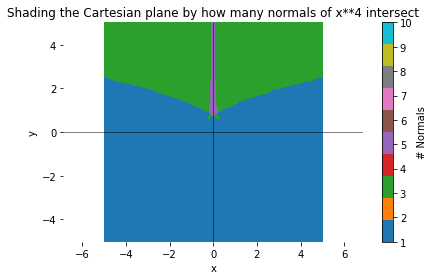

In [17]:
# PLOTTING
DETAIL = 200 # Be careful changing this, higher numbers slow down performance

x_min, x_max = -5, 5
y_min, y_max = -5, 5

x_range = np.linspace(x_min, x_max, DETAIL)
y_range = np.linspace(y_min, y_max, DETAIL)

X, Y = np.meshgrid(x_range, y_range)

vectorized_function = np.vectorize(normal_count)
Z = vectorized_function(X, Y)

colors = plt.cm.tab10.colors[:10]
cmap_custom = mcolors.ListedColormap(colors)

cmap_custom = mcolors.ListedColormap(colors)

plt.pcolormesh(X, Y, Z, cmap=cmap_custom, vmin=1, vmax=10, shading='auto')

colorbar = plt.colorbar(ticks=np.arange(1, 11))
colorbar.set_label('# Normals')

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Shading the Cartesian plane by how many normals of {f} intersect')
plt.axis('equal')
plt.tight_layout()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.box()
plt.show()